In [1]:
import re 
import pandas as pd

In [2]:
f=open('WhatsApp Chat with Mechanical Engg 5th Sem 2024.txt','r',encoding='utf-8')
data=f.read()

In [3]:
pattern = r'\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

    # Split data into messages and dates
messages = re.split(pattern, data)[1:]  # Messages start from index 1
dates = re.findall(pattern, data)  # Extract date patterns # generating a regular expression (regex) upto '09/02/24, 22:13 - '

In [4]:
df = pd.DataFrame({'user_message': messages, 'message_date': dates})
    # convert message_date type
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%y, %H:%M - ')

df.rename(columns={'message_date': 'date'}, inplace=True)
df.head()


,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2023-07-18 21:48:00
1,"SSR Sir NIT DGP created group ""Mechanical Engg...",2023-07-18 16:42:00
2,You joined using this group's invite link\n,2023-07-18 21:48:00
3,+91 63030 61436 joined using this group's invi...,2023-07-18 22:19:00
4,+91 86701 61033 joined using this group's invi...,2023-07-18 23:32:00


In [5]:
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:  # user name
        users.append(entry[1])
        messages.append(" ".join(entry[2:]))
    else:
        users.append('group_notification')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)
df.head()

<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\w'
C:\Users\DELL\AppData\Local\Temp\ipykernel_35712\4139260524.py:4: SyntaxWarning: invalid escape sequence '\w'
  entry = re.split('([\w\W]+?):\s', message)


,date,user,message
0,2023-07-18 21:48:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2023-07-18 16:42:00,group_notification,"SSR Sir NIT DGP created group ""Mechanical Engg..."
2,2023-07-18 21:48:00,group_notification,You joined using this group's invite link\n
3,2023-07-18 22:19:00,group_notification,+91 63030 61436 joined using this group's invi...
4,2023-07-18 23:32:00,group_notification,+91 86701 61033 joined using this group's invi...


In [6]:
df.size

5244

In [7]:
df['year']=df['date'].dt.year
df.head()

,date,user,message,year
0,2023-07-18 21:48:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023
1,2023-07-18 16:42:00,group_notification,"SSR Sir NIT DGP created group ""Mechanical Engg...",2023
2,2023-07-18 21:48:00,group_notification,You joined using this group's invite link\n,2023
3,2023-07-18 22:19:00,group_notification,+91 63030 61436 joined using this group's invi...,2023
4,2023-07-18 23:32:00,group_notification,+91 86701 61033 joined using this group's invi...,2023


In [8]:
df['month']=df['date'].dt.month_name()
df.head()

,date,user,message,year,month
0,2023-07-18 21:48:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,July
1,2023-07-18 16:42:00,group_notification,"SSR Sir NIT DGP created group ""Mechanical Engg...",2023,July
2,2023-07-18 21:48:00,group_notification,You joined using this group's invite link\n,2023,July
3,2023-07-18 22:19:00,group_notification,+91 63030 61436 joined using this group's invi...,2023,July
4,2023-07-18 23:32:00,group_notification,+91 86701 61033 joined using this group's invi...,2023,July


In [9]:
df['day']=df['date'].dt.day
df.head()

,date,user,message,year,month,day
0,2023-07-18 21:48:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,July,18
1,2023-07-18 16:42:00,group_notification,"SSR Sir NIT DGP created group ""Mechanical Engg...",2023,July,18
2,2023-07-18 21:48:00,group_notification,You joined using this group's invite link\n,2023,July,18
3,2023-07-18 22:19:00,group_notification,+91 63030 61436 joined using this group's invi...,2023,July,18
4,2023-07-18 23:32:00,group_notification,+91 86701 61033 joined using this group's invi...,2023,July,18


In [10]:
df['hour']=df['date'].dt.hour
df['minute']=df['date'].dt.minute
df.head()

,date,user,message,year,month,day,hour,minute
0,2023-07-18 21:48:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,July,18,21,48
1,2023-07-18 16:42:00,group_notification,"SSR Sir NIT DGP created group ""Mechanical Engg...",2023,July,18,16,42
2,2023-07-18 21:48:00,group_notification,You joined using this group's invite link\n,2023,July,18,21,48
3,2023-07-18 22:19:00,group_notification,+91 63030 61436 joined using this group's invi...,2023,July,18,22,19
4,2023-07-18 23:32:00,group_notification,+91 86701 61033 joined using this group's invi...,2023,July,18,23,32


In [11]:
words=[]

for message in df['message']:
    print(message)

Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.

SSR Sir NIT DGP created group "Mechanical Engg 3rd Sem 2023"

You joined using this group's invite link

+91 63030 61436 joined using this group's invite link

+91 86701 61033 joined using this group's invite link

+91 79083 28116 joined using this group's invite link

+91 98740 35069 joined using this group's invite link

+91 93301 59778 joined using this group's invite link

+91 62050 50846 joined using this group's invite link

+91 97499 99343 joined using this group's invite link

+91 62900 20427 joined using this group's invite link

+91 62896 91109 joined using this group's invite link

+91 89458 96607 joined using this group's invite link

+91 74888 98308 joined using this group's invite link

+91 90887 80133 joined using this group's invite link

null

Welcome to this Whatsapp group.
May I request all ME 3rd sem students to join this group

In [12]:
df.head()


,date,user,message,year,month,day,hour,minute
0,2023-07-18 21:48:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,July,18,21,48
1,2023-07-18 16:42:00,group_notification,"SSR Sir NIT DGP created group ""Mechanical Engg...",2023,July,18,16,42
2,2023-07-18 21:48:00,group_notification,You joined using this group's invite link\n,2023,July,18,21,48
3,2023-07-18 22:19:00,group_notification,+91 63030 61436 joined using this group's invi...,2023,July,18,22,19
4,2023-07-18 23:32:00,group_notification,+91 86701 61033 joined using this group's invi...,2023,July,18,23,32


In [13]:
x=df["user"].value_counts().head(5)
x

user
SSR Sir NIT DGP       1016
group_notification     111
+91 62064 49375         27
+91 93366 84985         22
+91 82780 62868         19
Name: count, dtype: int64

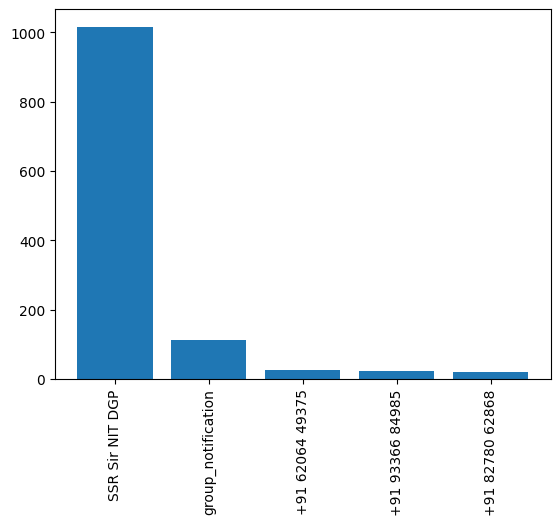

In [14]:
import matplotlib.pyplot as plt
name=x.index
count=x.values
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [15]:
# % of chats per user in the group and converting it into a dataframe
round((df['user'].value_counts() / df.shape[0]) * 100, 2).reset_index().rename(columns={'user': 'Name', 'count': 'Percentage'})


,Name,Percentage
0,SSR Sir NIT DGP,58.12
1,group_notification,6.35
2,+91 62064 49375,1.54
3,+91 93366 84985,1.26
4,+91 82780 62868,1.09
...,...,...
136,+91 94415 47377,0.06
137,+91 78424 05876,0.06
138,+91 94748 05120,0.06
139,+91 88275 70482,0.06


In [27]:
#remove group notifications,media omitted and stop words e.g. the,and,etc.
temp=df[df['user']!='group_notification']
temp=temp[temp['message']!='<Media omitted>\n']
f=open('stop_hinglish.txt','r')
stop_words=f.read()
# getting top 20 words in the group
words=[]
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)
    words.extend(message.split())
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,of,548
1,the,514
2,to,495
3,class,315
4,&,300
5,for,237
6,in,227
7,message,226
8,and,204
9,you,202


In [31]:
df['month_num']=df['date'].dt.month
timeline=df.groupby(['year','month_num',month]).count()['message'].reset_index()
timeline

,year,month_num,message
0,2023,7,80
1,2023,8,26
2,2023,9,7
3,2023,10,16
4,2023,11,26
5,2023,12,5
6,2024,1,72
7,2024,2,158
8,2024,3,280
9,2024,4,224


In [39]:
df['day_name']=df['date'].dt.day_name()
df['day_name'].value_counts()

day_name
Sunday       353
Monday       313
Thursday     251
Friday       227
Tuesday      219
Saturday     204
Wednesday    181
Name: count, dtype: int64